In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
KCPD_2016 = "kcpd_2016.csv"
KCPD_2017 = "kcpd_2017.csv"
kcpd_2016_df = pd.read_csv(KCPD_2016)
kcpd_2017_df = pd.read_csv(KCPD_2017)

In [3]:
total_crime = kcpd_2016_df.append(kcpd_2017_df)


#for x in total_crime["From_Time"]:
#    total_crime["From_Time"] = total_crime["From_Time"].str.split(':').str[0]
#    total_crime["From_Time"] = (total_crime["From_Time"] + ":00")

total_crime = total_crime.loc[:, ["Description", "Firearm Used Flag", "From_Date", "From_Time", "Zip Code"]]
total_crime = total_crime.dropna(how='any')
total_crime.head()

,Description,Firearm Used Flag,From_Date,From_Time,Zip Code
0,Aggravated Assault (,Y,12/25/2016,8:00,64134
1,Aggravated Assault (,Y,12/25/2016,8:00,64134
2,Armed Robbery,Y,12/25/2016,5:00,64133
3,Armed Robbery,Y,12/25/2016,5:00,64133
4,Armed Robbery,Y,12/25/2016,5:00,64133


In [4]:
file1 = "temperature.csv"
file2 = "weather_description.csv"

In [5]:
temp_df = pd.read_csv(file1)
condition_df = pd.read_csv(file2)
condition_df.head()

,date,time,Kansas City
0,10/1/2012,13:00,sky is clear
1,10/1/2012,14:00,sky is clear
2,10/1/2012,15:00,sky is clear
3,10/1/2012,16:00,sky is clear
4,10/1/2012,17:00,sky is clear


In [6]:
temp_df.head()

,date,time,Kansas City
0,10/1/2012,13:00,289.980000
1,10/1/2012,14:00,289.997635
2,10/1/2012,15:00,290.038151
3,10/1/2012,16:00,290.078666
4,10/1/2012,17:00,290.119181


In [7]:
len(temp_df["Kansas City"])

45252

In [8]:
len(condition_df["Kansas City"])

45252

In [9]:
kc_temp = pd.DataFrame(temp_df["date"])
kc_temp["time"] = temp_df["time"]
kc_temp["Temperature (K)"] = temp_df["Kansas City"]
kc_temp.head()

,date,time,Temperature (K)
0,10/1/2012,13:00,289.980000
1,10/1/2012,14:00,289.997635
2,10/1/2012,15:00,290.038151
3,10/1/2012,16:00,290.078666
4,10/1/2012,17:00,290.119181


In [10]:
kc_cond = pd.DataFrame(condition_df["date"])
kc_cond["time"] = condition_df["time"]
kc_cond["Condition"] = condition_df["Kansas City"]
kc_cond.head()

,date,time,Condition
0,10/1/2012,13:00,sky is clear
1,10/1/2012,14:00,sky is clear
2,10/1/2012,15:00,sky is clear
3,10/1/2012,16:00,sky is clear
4,10/1/2012,17:00,sky is clear


In [11]:
kc_df = pd.merge(kc_temp, kc_cond, left_on=["date", "time"], right_on=["date", "time"])
kc_df.head()

,date,time,Temperature (K),Condition
0,10/1/2012,13:00,289.980000,sky is clear
1,10/1/2012,14:00,289.997635,sky is clear
2,10/1/2012,15:00,290.038151,sky is clear
3,10/1/2012,16:00,290.078666,sky is clear
4,10/1/2012,17:00,290.119181,sky is clear


In [12]:
kc_weather = kc_df[(kc_df["date"] > "11/10/2014")]
kc_df['date'] = pd.to_datetime(kc_df['date'])
kc_weather = (kc_df["date"] > "12/31/2015")
kc_df = kc_df.loc[kc_weather]
kc_df.head()
#kc_weather.dtypes
#kc_weather.head()

,date,time,Temperature (K),Condition
28475,2016-01-01,0:00,273.790000,sky is clear
28476,2016-01-01,1:00,273.731449,sky is clear
28477,2016-01-01,2:00,269.429724,sky is clear
28478,2016-01-01,3:00,271.920000,sky is clear
28479,2016-01-01,4:00,271.030000,sky is clear


In [13]:
kc_df["Temperature (F)"] = (1.8*(kc_df["Temperature (K)"]-273)+32)

In [14]:
del kc_df["Temperature (K)"]
kc_df.head()

,date,time,Condition,Temperature (F)
28475,2016-01-01,0:00,sky is clear,33.422000
28476,2016-01-01,1:00,sky is clear,33.316608
28477,2016-01-01,2:00,sky is clear,25.573504
28478,2016-01-01,3:00,sky is clear,30.056000
28479,2016-01-01,4:00,sky is clear,28.454000


In [15]:
kc_df["Condition"].unique()

array(['sky is clear', 'light rain', 'scattered clouds',
       'overcast clouds', 'broken clouds', 'few clouds',
       'light intensity drizzle', 'mist', 'light snow', 'moderate rain',
       'haze', 'snow', 'shower drizzle', 'heavy intensity rain',
       'squalls', 'thunderstorm with heavy rain', 'fog',
       'proximity thunderstorm', 'thunderstorm with light rain',
       'thunderstorm', 'very heavy rain', 'drizzle',
       'proximity shower rain', 'shower rain',
       'light intensity shower rain', 'heavy intensity shower rain',
       'freezing rain', 'thunderstorm with rain'], dtype=object)

In [16]:
category = {'sky is clear' : 'clear', 'light rain' : 'rain', 'scattered clouds' : 'clear',
       'overcast clouds' : 'clear', 'broken clouds' : 'clear', 'few clouds' : 'clear',
       'light intensity drizzle' : 'rain', 'mist' : 'rain', 'light snow' : 'snow', 'moderate rain' : 'rain',
       'haze' : 'other', 'snow' : 'snow', 'shower drizzle' : 'rain', 'heavy intensity rain' : 'rain',
       'squalls' : 'rain', 'thunderstorm with heavy rain':'rain', 'fog': 'other',
       'proximity thunderstorm': 'rain', 'thunderstorm with light rain':'rain',
       'thunderstorm':'rain', 'very heavy rain':'rain', 'drizzle':'rain',
       'proximity shower rain':'rain', 'shower rain':'rain',
       'light intensity shower rain':'rain', 'heavy intensity shower rain':'rain',
       'freezing rain':'rain', 'thunderstorm with rain':'rain', 'heavy snow':"snow", 'smoke':'other'}

In [17]:
condition_list = []

for index, row in kc_df.iterrows():
    condition_list.append(category[row['Condition']])

In [18]:
kc_df["classification"] = condition_list

In [19]:
kc_df.head()

,date,time,Condition,Temperature (F),classification
28475,2016-01-01,0:00,sky is clear,33.422000,clear
28476,2016-01-01,1:00,sky is clear,33.316608,clear
28477,2016-01-01,2:00,sky is clear,25.573504,clear
28478,2016-01-01,3:00,sky is clear,30.056000,clear
28479,2016-01-01,4:00,sky is clear,28.454000,clear


In [20]:
total_crime['From_Date'] = pd.to_datetime(total_crime['From_Date'])



In [21]:
merge_df = pd.merge(total_crime, kc_df, left_on=["From_Date", "From_Time"], right_on=["date", "time"])
merge_df.head()

,Description,Firearm Used Flag,From_Date,From_Time,Zip Code,date,time,Condition,Temperature (F),classification
0,Aggravated Assault (,Y,2016-12-25,8:00,64134,2016-12-25,8:00,mist,40.694,rain
1,Aggravated Assault (,Y,2016-12-25,8:00,64134,2016-12-25,8:00,mist,40.694,rain
2,Aggravated Assault (,Y,2016-12-25,8:00,64134,2016-12-25,8:00,mist,40.694,rain
3,Aggravated Assault (,Y,2016-12-25,8:00,64134,2016-12-25,8:00,mist,40.694,rain
4,Possession/Sale/Dist,N,2016-12-25,8:00,64110,2016-12-25,8:00,mist,40.694,rain


In [22]:
clear_weather_df = kc_df.loc[kc_df["classification"] == "clear"]
rainy_weather_df = kc_df.loc[kc_df["classification"] == "rain"]
snowy_weather_df = kc_df.loc[kc_df["classification"] == "snow"]
other_weather_df = kc_df.loc[kc_df["classification"] == "other"]

In [23]:
theft_df = merge_df.loc[merge_df["Description"].isin(['Strong Arm Robbery', 'Armed Robbery', 
                           'Stealing Shoplifting', 'Stealing All Other', 'Burglary - Residence', 'Stealing From Auto', 
                           'Auto Theft', 'Burglary - Non Resid', 'Credit/Debit/ATM Car', 'Stealing Pickpocket', 'Auto Theft Outside S', 'Curfew'
                           'Stealing Purse Snatc', 'Idenity Theft', 'Stealing Auto Parts/', 'Forged Checks', 'Stealing Coin Operat', 
                           'Fraud/Confidence Gam', 'Burg Res Occ', 'STEAL TFA', 'fraud', 'robbery', 'Welfare Fraud', 'Stealing Acc',
                           'Stealing from uildi', 'strong armed robbery', 'counterfeiting', 'auto theft'])]

violent_df = merge_df.loc[merge_df["Description"].isin(['Agg Assault - Domest', 'Aggravated Assault (', 'Agg Assault - Drive-', 
                             'Non Agg Assault Dome', 'Non Aggravated Assau', 'Forcible Sodomy', 'HOMICIDE/Non Neglige',
                             'Statutory Rape', 'Sexual Assault with', 'Rape', 'Forcible Fondling', 'NON AGG ASSAULT DV', 
                             'non agg assault','Hit and Run of a Per', 'Agg Assault Dome', 'agg dv assault', 
                             'Justifiable Homicide', 'Aggravated Assault'])]

non_violent_df = merge_df.loc[merge_df["Description"].isin(['Family Offense', 'Misc Violation', 
                                 'Property Damage', 'Violation Ex Parte O', 'Dead Body', 'Kidnapping/Abduction', 
                                 'Weapons Law Violatio', 'Wire Fraud', 'Possession/Sale/Dist', 'Possession of Drug E', 
                                 'Sex Off Fondle - mol', 'Violation Full Order', 'Identity Theft', 'Sex Off Misconduct', 
                                 'Driving Under Influe', 'Sex Offense -others', 'Interference with Cu', 'Family Disturbance',
                                 'Resisting an Officer', 'Sex Off Indecent Con', 'Intimidation', 'Sex Off Follow/Entic',
                                 'Sex Off Indecent Exp', 'Missing/Runaway Juve', 'Trespassing', 'Disorderly Conduct',
                                 'Stolen Property OFFE', 'Arson', 'Stealing Bicycles', 'Pornography', 'Hacking/Computer Inv',
                                 'False Information to', 'Liquor Law Violaton','Bomb Threat/Intimida', 'Extortion/Blackmail', 
                                 'Impersonation - NOT', 'Forgery', 'Loitering', 'Counterfeiting', 'Peeping Tom', 'Embezzlement',
                                 'Promoting Prostituti', 'Prostitution/Solicit', 'Prostitution/Patroni', 'Passing Bad Checks',
                                 'Casualty (includes a', 'Stalking', 'False ID', 'Failure to Return', 'Drunkenness', 'forgery', 
                                 'INTIMIDATE', 'Animal Cruelty', 'disorderly conduct', 'misc off', 'kidnapping', 'Arson with Fire Bomb'
                                 'trespassing', 'Misc Viol(2601)', 'Vagrancy', 'broken window', 'property damage', 
                                 'Human Trafficking/Co', 'Sex Off Incest', 'MISSING PERSON'])]

suicide_df = merge_df.loc[merge_df["Description"].isin(['Attempt Suicide by O', 'Attempt Suicide by C', 'Attempt Suicide by H', 'Attempt Suicide by S',
                             'Attempt Suicide by P', 'Suicide By Sleeping', 'Attempt Suicide by J', 'Suicide By Cutting', 'Attempt Suicide by G', 
                             'Suicide By Shooting', 'Suicide By Hanging', 'Suicide by Other Mea', 'Suicide - Domestic V'])]

theft_df_no_weather = total_crime.loc[total_crime["Description"].isin(['Strong Arm Robbery', 'Armed Robbery', 
                           'Stealing Shoplifting', 'Stealing All Other', 'Burglary - Residence', 'Stealing From Auto', 
                           'Auto Theft', 'Burglary - Non Resid', 'Credit/Debit/ATM Car', 'Stealing Pickpocket', 'Auto Theft Outside S', 'Curfew'
                           'Stealing Purse Snatc', 'Idenity Theft', 'Stealing Auto Parts/', 'Forged Checks', 'Stealing Coin Operat', 
                           'Fraud/Confidence Gam', 'Burg Res Occ', 'STEAL TFA', 'fraud', 'robbery', 'Welfare Fraud', 'Stealing Acc',
                           'Stealing from uildi', 'strong armed robbery', 'counterfeiting', 'auto theft'])]

violent_df_no_weather = total_crime.loc[total_crime["Description"].isin(['Agg Assault - Domest', 'Aggravated Assault (', 'Agg Assault - Drive-', 
                             'Non Agg Assault Dome', 'Non Aggravated Assau', 'Forcible Sodomy', 'HOMICIDE/Non Neglige',
                             'Statutory Rape', 'Sexual Assault with', 'Rape', 'Forcible Fondling', 'NON AGG ASSAULT DV', 
                             'non agg assault','Hit and Run of a Per', 'Agg Assault Dome', 'agg dv assault', 
                             'Justifiable Homicide', 'Aggravated Assault'])]

non_violent_df_no_weather = total_crime.loc[total_crime["Description"].isin(['Family Offense', 'Misc Violation', 
                                 'Property Damage', 'Violation Ex Parte O', 'Dead Body', 'Kidnapping/Abduction', 
                                 'Weapons Law Violatio', 'Wire Fraud', 'Possession/Sale/Dist', 'Possession of Drug E', 
                                 'Sex Off Fondle - mol', 'Violation Full Order', 'Identity Theft', 'Sex Off Misconduct', 
                                 'Driving Under Influe', 'Sex Offense -others', 'Interference with Cu', 'Family Disturbance',
                                 'Resisting an Officer', 'Sex Off Indecent Con', 'Intimidation', 'Sex Off Follow/Entic',
                                 'Sex Off Indecent Exp', 'Missing/Runaway Juve', 'Trespassing', 'Disorderly Conduct',
                                 'Stolen Property OFFE', 'Arson', 'Stealing Bicycles', 'Pornography', 'Hacking/Computer Inv',
                                 'False Information to', 'Liquor Law Violaton','Bomb Threat/Intimida', 'Extortion/Blackmail', 
                                 'Impersonation - NOT', 'Forgery', 'Loitering', 'Counterfeiting', 'Peeping Tom', 'Embezzlement',
                                 'Promoting Prostituti', 'Prostitution/Solicit', 'Prostitution/Patroni', 'Passing Bad Checks',
                                 'Casualty (includes a', 'Stalking', 'False ID', 'Failure to Return', 'Drunkenness', 'forgery', 
                                 'INTIMIDATE', 'Animal Cruelty', 'disorderly conduct', 'misc off', 'kidnapping', 'Arson with Fire Bomb'
                                 'trespassing', 'Misc Viol(2601)', 'Vagrancy', 'broken window', 'property damage', 
                                 'Human Trafficking/Co', 'Sex Off Incest', 'MISSING PERSON'])]

suicide_df_no_weather = total_crime.loc[total_crime["Description"].isin(['Attempt Suicide by O', 'Attempt Suicide by C', 'Attempt Suicide by H', 'Attempt Suicide by S',
                             'Attempt Suicide by P', 'Suicide By Sleeping', 'Attempt Suicide by J', 'Suicide By Cutting', 'Attempt Suicide by G', 
                             'Suicide By Shooting', 'Suicide By Hanging', 'Suicide by Other Mea', 'Suicide - Domestic V'])]

<function matplotlib.pyplot.show>

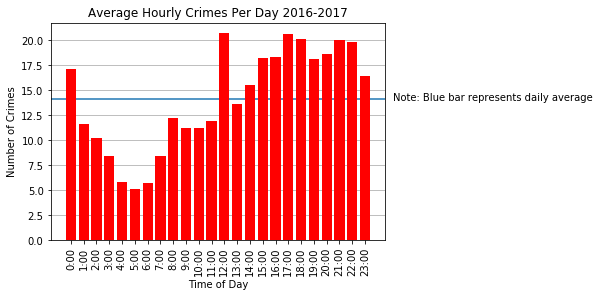

In [24]:
crime_hour_count = merge_df
crime_hour_count = crime_hour_count.groupby(["time"], as_index=False).count()

crime_hour_count["Hour"] = [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 23,
                          2, 3, 4, 5, 6, 7, 8, 9]
crime_hour_count = crime_hour_count.sort_values(by=["Hour"])
crime_hour_count.reset_index()

fig, ax = plt.subplots()
merge_count = merge_df
merge_count = merge_count.count()
per_hour = (merge_count["Description"]/730)/24


labels = ("0:00", "1:00", "2:00", "3:00", "4:00", "5:00", "6:00", "7:00", "8:00", "9:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00")

x_axis = np.arange(len(crime_hour_count["From_Time"]))
plt.gca().yaxis.grid(True)

plt.bar(x_axis, (crime_hour_count["Description"]/730), color = "red", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

plt.title("Average Hourly Crimes Per Day 2016-2017")
ax.axhline(per_hour)
plt.ylabel("Number of Crimes")
plt.xlabel("Time of Day")

text = "Note: Blue bar represents daily average"
ax.text(33, 14, text, ha='center')

plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)


plt.show

In [25]:
bin_merge = total_crime
bin_merge.set_index('From_Date', inplace=True)

<function matplotlib.pyplot.show>

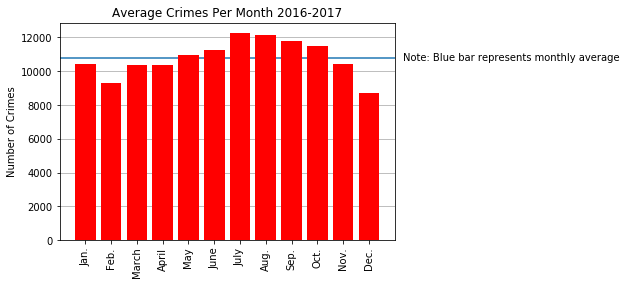

In [26]:
bin_merge=bin_merge.groupby([(bin_merge.index.month)]).count()

bin_merge["month"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
bin_merge = bin_merge.sort_values(by=["month"])
bin_merge.reset_index()

labels = ("Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec.")

fig, ax = plt.subplots()
total_crime_count = total_crime.count()
avg_hour_tc = (total_crime_count["Description"]/12)/2

x_axis = np.arange(len(bin_merge["month"]))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, (bin_merge["Description"]/2), color = "red", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)


plt.title("Average Crimes Per Month 2016-2017")
ax.axhline(avg_hour_tc)

text = "Note: Blue bar represents monthly average"
ax.text(16.5, 10650, text, ha='center')

plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)

plt.show

<function matplotlib.pyplot.show>

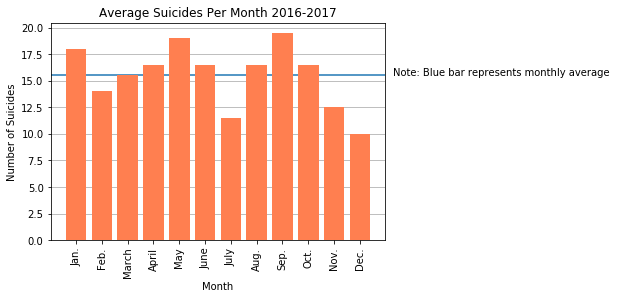

In [27]:
suicide_bin = suicide_df_no_weather
suicide_bin.set_index('From_Date', inplace=True)

suicide_bin=suicide_bin.groupby([(suicide_bin.index.month)]).count()

suicide_bin["month"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
suicide_bin = suicide_bin.sort_values(by=["month"])
suicide_bin.reset_index()

fig, ax = plt.subplots()
total_suicide = suicide_df_no_weather.count()
avg_month_s = (total_suicide["Description"]/12)/2

labels = ("Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec.")

x_axis = np.arange(len(suicide_bin["month"]))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, (suicide_bin["Description"]/2), color = "coral", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)


plt.title("Average Suicides Per Month 2016-2017")
ax.axhline(avg_month_s)

text = "Note: Blue bar represents monthly average"
ax.text(16.5, 15.5, text, ha='center')

plt.ylabel("Number of Suicides")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)

plt.show

<function matplotlib.pyplot.show>

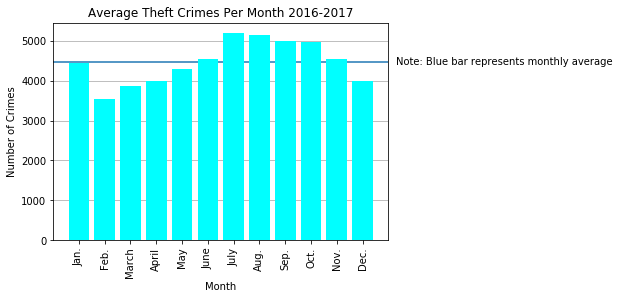

In [28]:
theft_bin = theft_df_no_weather
theft_bin.set_index('From_Date', inplace=True)

theft_bin=theft_bin.groupby([(theft_bin.index.month)]).count()

theft_bin["month"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
theft_bin = theft_bin.sort_values(by=["month"])
theft_bin.reset_index()

fig, ax = plt.subplots()
total_theft = theft_df_no_weather.count()
total_theft = (total_theft["Description"]/12)/2

labels = ("Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec.")

x_axis = np.arange(len(theft_bin["month"]))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, (theft_bin["Description"]/2), color = "cyan", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)


plt.title("Average Theft Crimes Per Month 2016-2017")
ax.axhline(total_theft)
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
text = "Note: Blue bar represents monthly average"
ax.text(16.5, 4400, text, ha='center')

plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)

plt.show

<function matplotlib.pyplot.show>

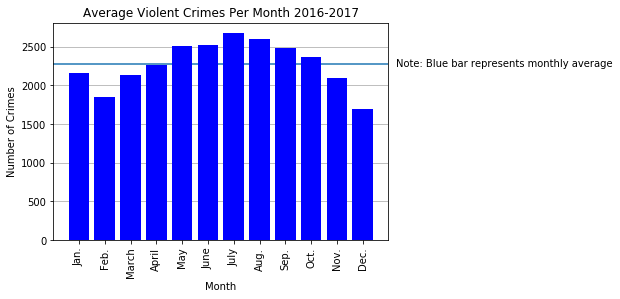

In [29]:
violent_bin = violent_df_no_weather
violent_bin.set_index('From_Date', inplace=True)

violent_bin=violent_bin.groupby([(violent_bin.index.month)]).count()

violent_bin["month"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
violent_bin = violent_bin.sort_values(by=["month"])
violent_bin.reset_index()

labels = ("Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec.")

fig, ax = plt.subplots()
total_violent = violent_df_no_weather.count()
total_violent = (total_violent["Description"]/12)/2

x_axis = np.arange(len(violent_bin["month"]))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, (violent_bin["Description"]/2), color = "blue", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

plt.title("Average Violent Crimes Per Month 2016-2017")
ax.axhline(total_violent)

text = "Note: Blue bar represents monthly average"
ax.text(16.5, 2250, text, ha='center')
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)

plt.show

<function matplotlib.pyplot.show>

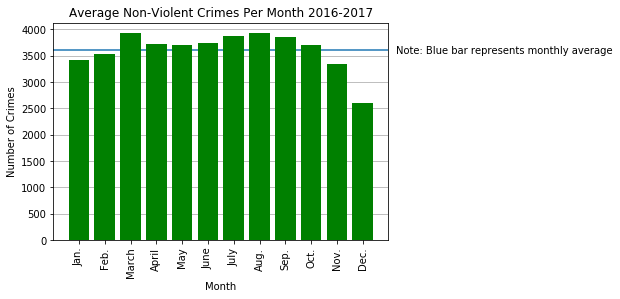

In [30]:
non_violent_bin = non_violent_df_no_weather
non_violent_bin.set_index('From_Date', inplace=True)

non_violent_bin=non_violent_bin.groupby([(non_violent_bin.index.month)]).count()

non_violent_bin["month"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
non_violent_bin = non_violent_bin.sort_values(by=["month"])
non_violent_bin.reset_index()

fig, ax = plt.subplots()
total_nviolent = non_violent_df_no_weather.count()
total_nviolent = (total_nviolent["Description"]/12)/2

labels = ("Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec.")

x_axis = np.arange(len(non_violent_bin["month"]))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, (non_violent_bin["Description"]/2), color = "green", zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

text = "Note: Blue bar represents monthly average"
ax.text(16.5, 3550, text, ha='center')

plt.title("Average Non-Violent Crimes Per Month 2016-2017")
ax.axhline(total_nviolent)
plt.ylabel("Number of Crimes")
plt.xlabel("Month")

plt.xticks(rotation=90)
plt.gca().yaxis.grid(True)

plt.show